In [7]:
# Inspiration for this test
# https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

In [67]:
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image

In [68]:

directory = "Plots/classified_split/"

size = 240
no_classes = 7

In [81]:
# Resize images to sensible resolution

root_dir = os.getcwd()
    
def resize():
    for root, dirs, files in os.walk(directory):
        path = root.split(os.sep)
        for file in files:
            if file.endswith(".png"):
                filepath = root_dir + "/" + "/".join(path) + "/" + file
                im = Image.open(filepath)
                # Convert to RGB since JPGs don't support transparency
                im = im.convert('RGB')
                f, e = os.path.splitext(filepath)
                imResize = im.resize((size,size), Image.ANTIALIAS)
                imResize.save(f + '-resized.jpg', 'JPEG', quality=90)
                # Delete original PNG
                os.remove(filepath)
    
    print("✅ All images resized")

resize()


In [82]:


trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=directory + "Training",target_size=(size,size))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=directory + "Validation", target_size=(size,size))


Found 399 images belonging to 7 classes.
Found 299 images belonging to 7 classes.


In [116]:
labels = traindata.class_indices
print(labels)

{'cut_maxwellian': 0, 'distorted': 1, 'flattened_maxwellian': 2, 'lowres_maxwellian': 3, 'max_and_line': 4, 'maxwellian': 5, 'ufo': 6}


In [ ]:
# TODO: load saved model if needed
# model = keras.models.load_model('path/to/location')

In [83]:
model = Sequential()
model.add(Conv2D(input_shape=(size,size,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=no_classes, activation="softmax"))

In [84]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [85]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 240, 240, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 240, 240, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 120, 120, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 120, 120, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 120, 120, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 60, 60, 128)      0         
 2D)                                                  

In [86]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit_generator(
    generator=traindata, 
    validation_data=testdata,
    epochs=100,
    callbacks=[checkpoint,early]
)

print("✅ Fitting completed")

/var/folders/cc/8bsksmrj41xdrbtgxrj55d8c0000gn/T/ipykernel_55407/3333547345.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
13/13 [==============================] - 155s 12s/step - loss: 1070.5859 - accuracy: 0.3860 - val_loss: 1.3668 - val_accuracy: 0.6488
Epoch 2/10
13/13 [==============================] - 151s 12s/step - loss: 1.5662 - accuracy: 0.6015 - val_loss: 1.3875 - val_accuracy: 0.7492
Epoch 3/10
13/13 [==============================] - 159s 12s/step - loss: 1.4874 - accuracy: 0.6140 - val_loss: 1.2101 - val_accuracy: 0.6488
Epoch 4/10
13/13 [==============================] - 165s 13s/step - loss: 1.0859 - accuracy: 0.7193 - val_loss: 0.9426 - val_accuracy: 0.7559
Epoch 5/10
13/13 [==============================] - 169s 13s/step - loss: 0.8469 - accuracy: 0.7619 - val_loss: 5.5274 - val_accuracy: 0.1003
Epoch 6/10
13/13 [==============================] - 175s 14s/step - loss: 1.3081 - accuracy: 0.6692 - val_loss: 0.6812 - val_accuracy: 0.7492
Epoch 7/10
13/13 [==============================] - 168s 13s/step - loss: 0.4606 - accuracy: 0.8546 - val_loss: 0.4196 - val_accuracy: 0.8495
Epo

In [130]:
model.save(root_dir + '/classification-models/v1')

INFO:tensorflow:Assets written to: /Users/jonne/university/plasma-dsp2022/classification-models/v1/assets


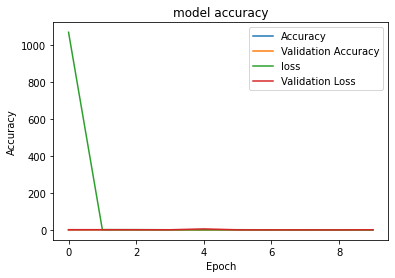

In [99]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

cut_maxwellian: 0.0027545937
distorted: 6.9935356e-07
flattened_maxwellian: 0.19895495
lowres_maxwellian: 0.022598358
max_and_line: 2.1595085e-06
maxwellian: 0.77568877
ufo: 4.896917e-07


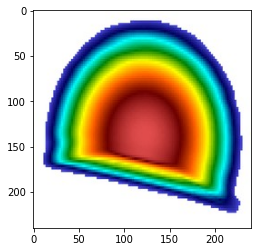

In [134]:
from keras.preprocessing import image

#image_file = "Validation/distorted/plot_vdf_proton_cellid_951_t90_xz_proj-resized.jpg"
#image_file = "Validation/max_and_line/plot_vdf_proton_cellid_1101_t140_xz_proj-resized.jpg"
#image_file = "Validation/maxwellian/plot_vdf_proton_cellid_426_t30_xz_proj-resized.jpg"
#image_file = "Validation/cut_maxwellian/plot_vdf_proton_cellid_526_t140_xz_proj-resized.jpg"
image_file = "Validation/flattened_maxwellian/plot_vdf_proton_cellid_801_t90_xz_proj-resized.jpg"

image_path = root_dir + "/" + directory + image_file

img = image.load_img(image_path,target_size=(size,size))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = model.predict(img)
probabilities = output[0]

for idx, key in enumerate(labels.keys()):
    print(key + ": " + str(probabilities[idx]))
